In [1]:
import torch
from torch.utils.data import Dataset

import cv2
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

In [2]:
class UCF(Dataset):
  def __init__(self,flag):
    super(UCF,self).__init__()
    self.dataset = self.get_image_paths()
    if flag == 'train':
      self.data = self.dataset[0:int(0.8*len(self.dataset))]
    elif flag=='test':
     self.data = self.dataset[int(0.8*len(self.dataset)):]
    else:
      print('could not load the dataset')


  def get_image_paths(self): #it contaions 10089 images
    data_path = "/content/drive/MyDrive/retrospective cycle GAN/UCF-101/img_data"
    data_frames = []
    for root, d_name, f_names in os.walk(data_path):
      video = []
      for f in f_names:
        video.append(os.path.join(root,f))
      if len(video) > 0:
        video.sort()
        i = 0
        j = 5
        while j <len(video):
          data_frames.append(video[i:j])
          i = i+1
          j = j+1
    return data_frames    

  def __len__(self):
    return len(self.data)
  
  def __getitem__(self,index):
    images = self.data[index] 

    for i,image in enumerate(images):
      data = cv2.imread(image, cv2.IMREAD_COLOR)
      data  = cv2.cvtColor(data,cv2.COLOR_BGR2RGB)
      data = data.transpose(2,0,1)
      data = (data/127.5) - 1
      data = np.float32(data)
      data = torch.tensor(data)
      if i == 0 :
        data_frames = data
      else:
        data_frames = np.concatenate((data_frames,data),axis=0)

    data_frames = torch.tensor(data_frames)
    return data_frames


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3844


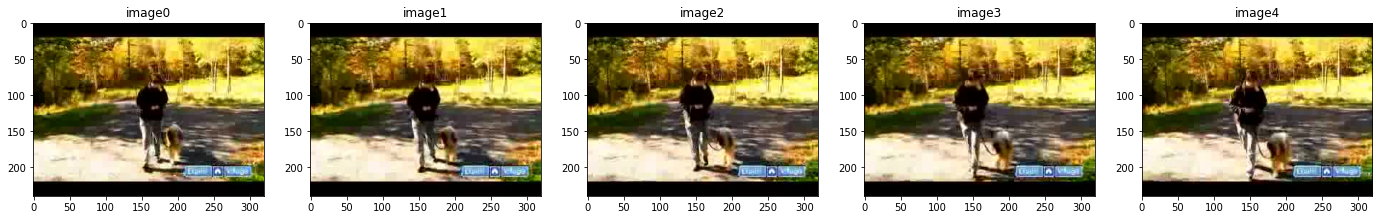

In [8]:
if __name__ == "__main__":
  test_dataset = UCF(flag='train')
  print(len(test_dataset))
  sample = test_dataset[20]
  sample = sample.numpy()
  cols = 5
  figure, ax = plt.subplots(nrows=1, ncols=cols, figsize=(24,6))
  for col in range(cols):
    image = sample[col*3:(col*3)+3,:,:]
    image = image.transpose(1,2,0)
    image = (image+1)*127.5
    image = image.astype('uint8')
    ax[col].imshow(image)
    ax[col].set_title(f'image{col}')